In [1]:
import matplotlib.pyplot as plt

In [2]:
import sys
from os.path import dirname
sys.path.append(dirname('./synthcity/src/'))

In [3]:
from synthcity.plugins import Plugins
from synthcity.benchmark import Benchmarks

/u/abhi24/matlaberp2/synthetic_time_series/newExpt/.newenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
Plugins(categories=["time_series"]).list()

['fflows', 'timevae', 'timegan']

# TODO List
## [X] Check whether library can be modified in real-time
## [] Make DP-SGD work
## [] Access the moment's accountant
## [X] Add support for DPRNN
## [X] Fix the data loader issue
## [X] Enable only encoder and discriminator-DP training
## [] Write a module for training a prediction model 
## [] Plot epsilon trade-off

In [5]:
from synthcity.utils.datasets.time_series.pbc import PBCDataloader
from synthcity.utils.datasets.time_series.google_stocks import GoogleStocksDataloader
from synthcity.plugins.core.dataloader import TimeSeriesDataLoader

In [6]:
# static_data, temporal_data, horizons, outcome = PBCDataloader().load()
static_data, temporal_data, horizons, outcome = GoogleStocksDataloader().load()

In [7]:
data = TimeSeriesDataLoader(
    temporal_data=temporal_data,
    observation_times=horizons,
    static_data=static_data,
    outcome=outcome,
)

In [8]:
syn_model_without_dp = Plugins().get("timegan", dp_enabled=False)

[2023-08-24T14:00:49.380951+0000][3600428][CRITICAL] load failed: 
GReaT is not installed. Please install it with pip install GReaT.
Please be aware that GReaT is only available for python >= 3.9.

[2023-08-24T14:00:49.382025+0000][3600428][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-08-24T14:00:49.382866+0000][3600428][CRITICAL] module plugin_great load failed
[2023-08-24T14:00:54.168833+0000][3600428][CRITICAL] module disabled: /u/abhi24/matlaberp2/synthetic_time_series/newExpt/./synthcity/src/synthcity/plugins/generic/plugin_goggle.py


In [12]:
new_model = Plugins().get("timegan", mode="LSTM")

[2023-08-24T14:06:52.858952+0000][3600428][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-08-24T14:06:52.858952+0000][3600428][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-08-24T14:06:52.861448+0000][3600428][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-08-24T14:06:52.861448+0000][3600428][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-08-24T14:06:52.863699+0000][3600428][CRITICAL] module plugin_great load failed
[2023-08-24T14:06:52.863699+0000][3600428][CRITICAL] module plugin_great load failed
[2023-08-24T14:06:52.866627+0000][3600428][CRITICAL] module disabled: /u/abhi24/matlaberp2/synthetic_time_series/newExpt/./synthcity/src/synthcity/plugins/generic/plugin_goggle.py
[2023-08-24T14:06:52.866627+0000][3600428][CRITICAL] module disabled: /u/abhi24/matlaberp2

In [13]:
new_model.fit(data)

100%|████████████████████████████████████████████████████| 1000/1000 [02:30<00:00,  6.67it/s]


In [9]:
syn_model_without_dp.fit(data)

100%|████████████████████████████████████████████████████| 1000/1000 [02:34<00:00,  6.47it/s]


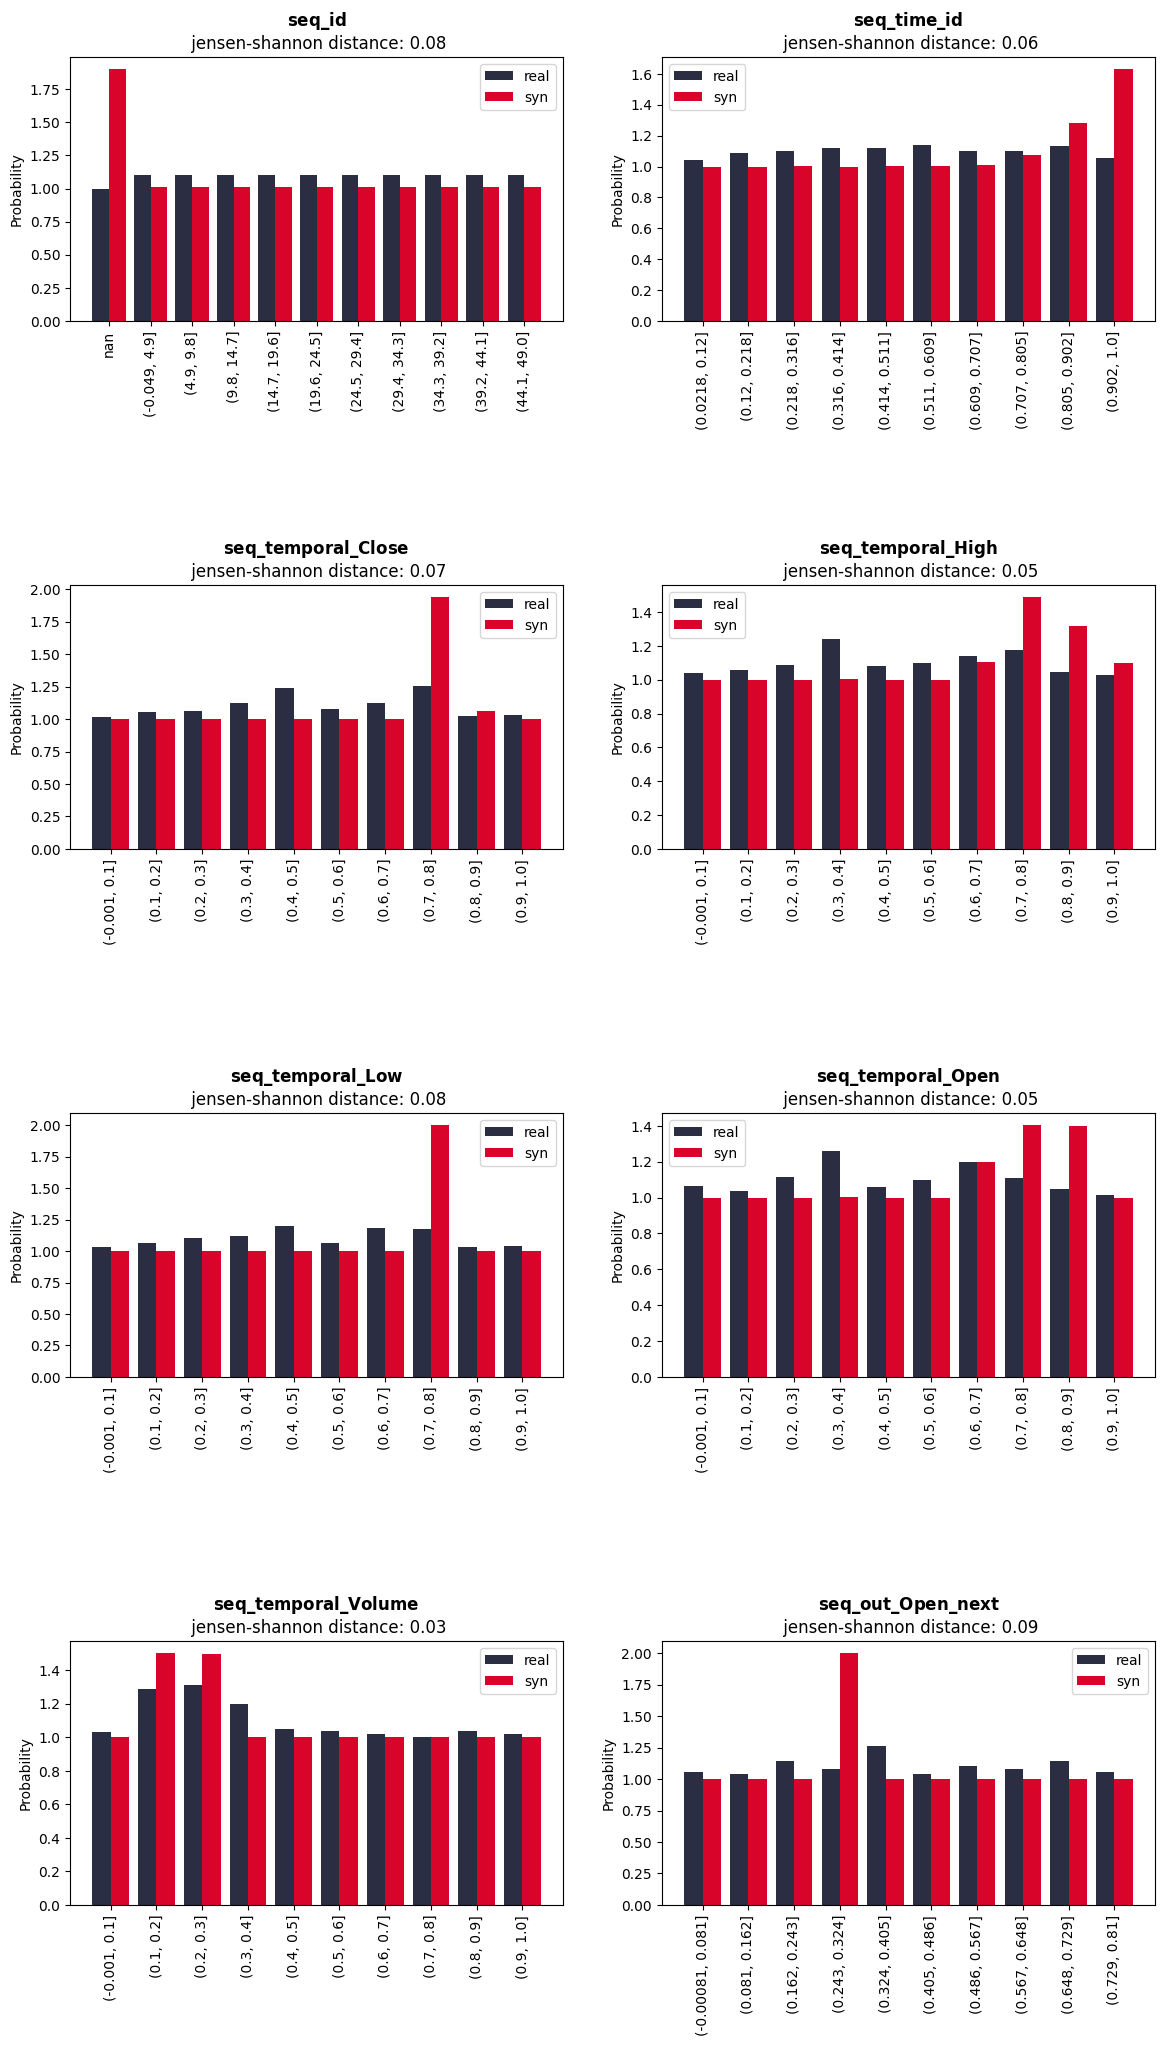

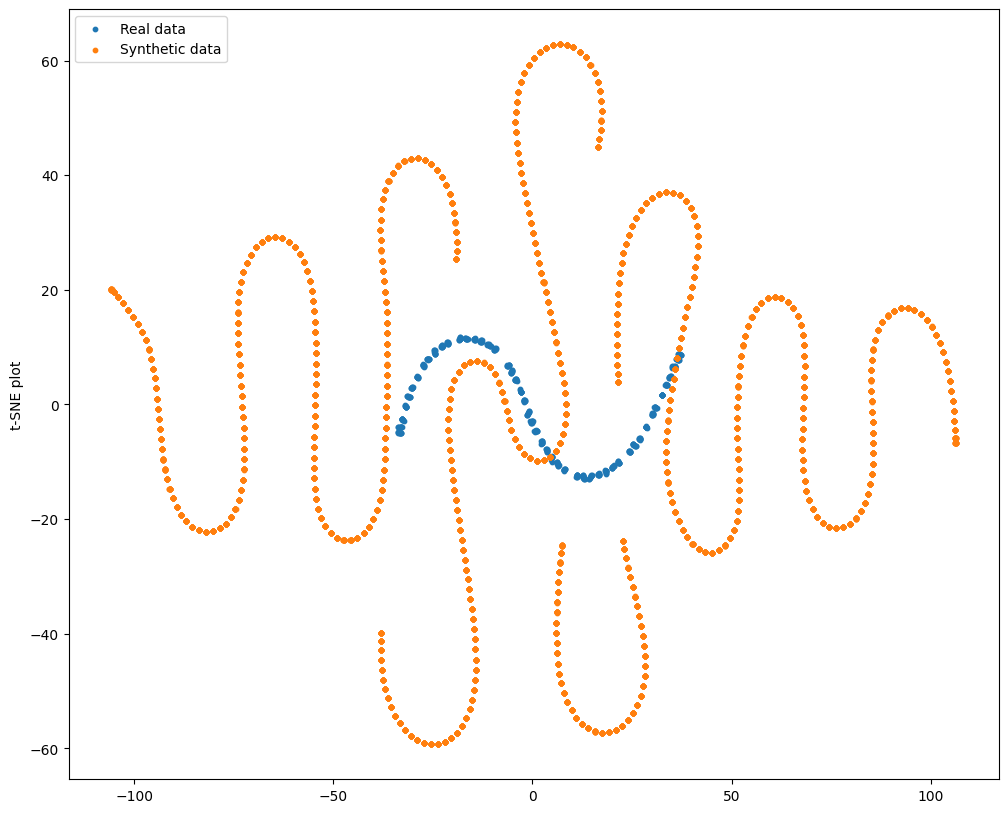

In [26]:
syn_model_without_dp.plot(plt, data)

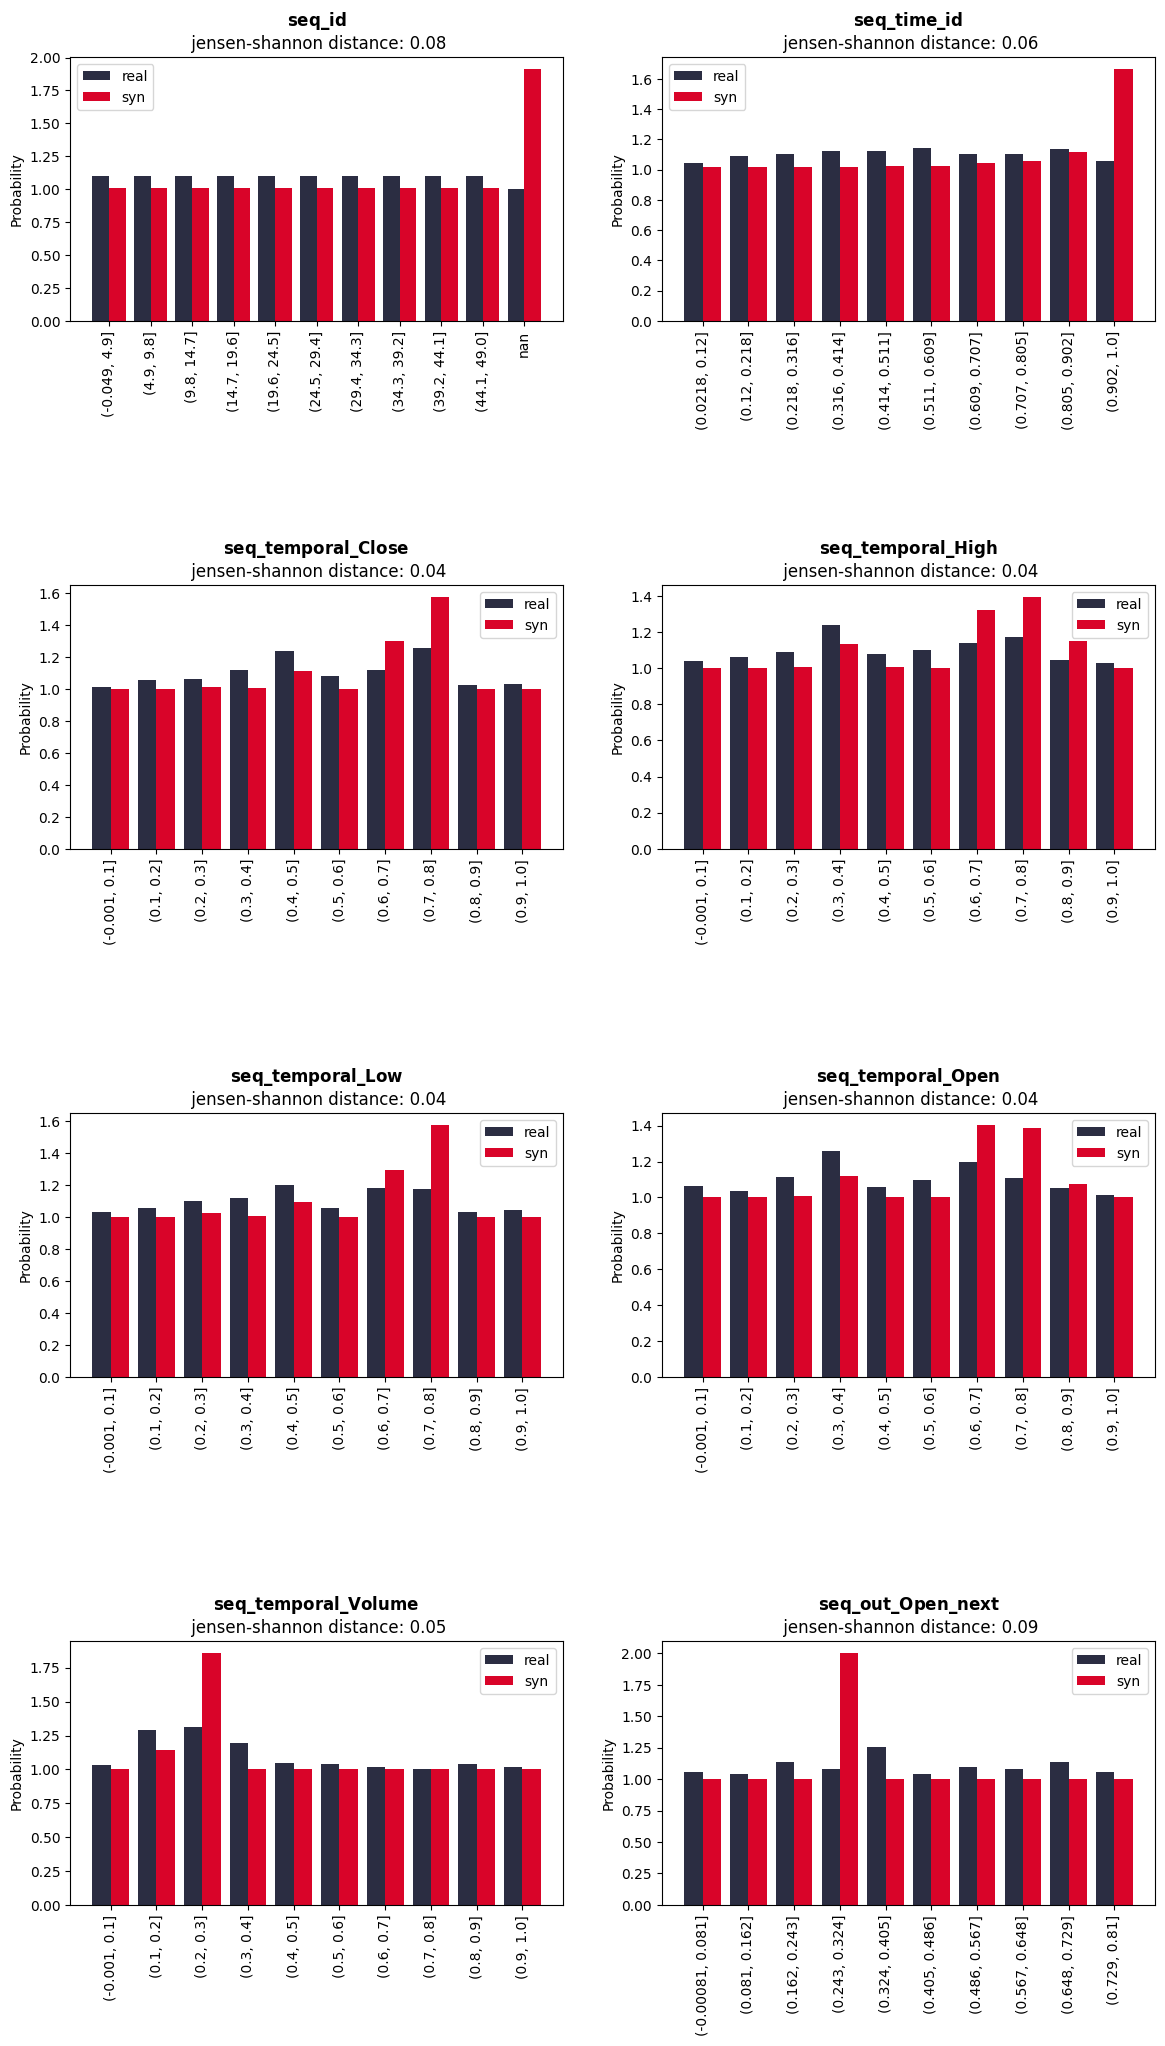

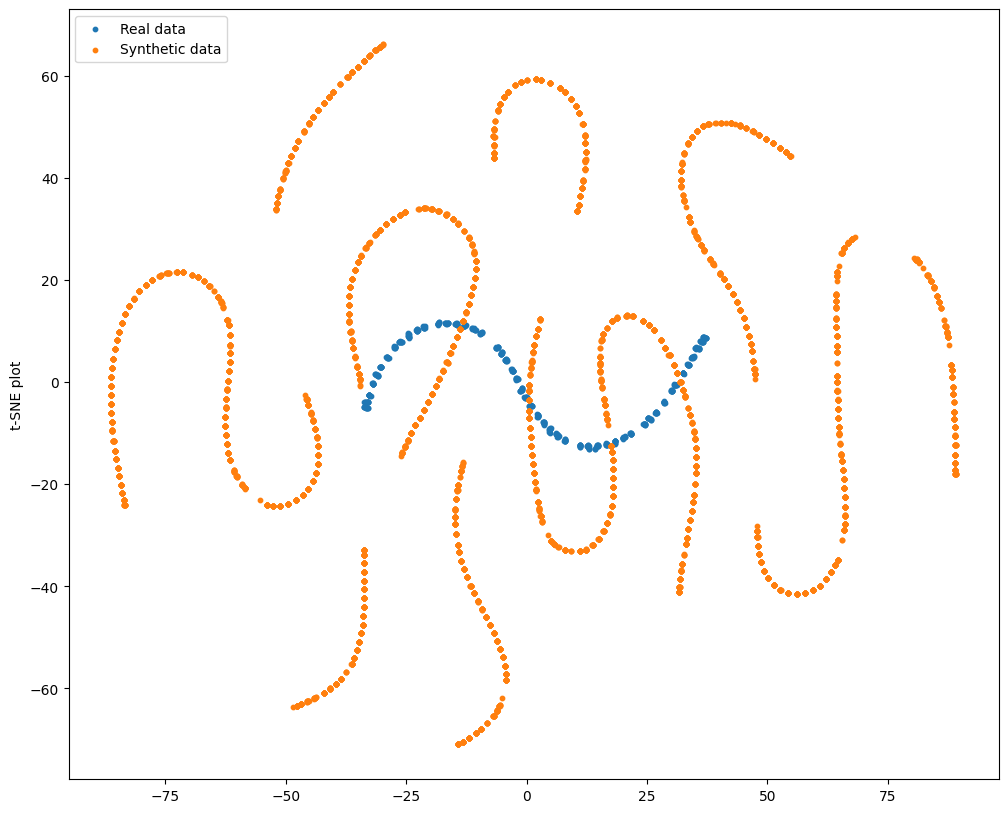

In [25]:
new_model.plot(plt, data)

In [23]:
Benchmarks.evaluate(
    [(f"test_{model}", "timegan", {"mode": model}) for model in ["RNN", "LSTM",]],
    data,
    synthetic_size=1000,
    repeats=1,
    synthetic_reuse_if_exists=False
)
    

[2023-08-24T14:25:16.802922+0000][3600428][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-08-24T14:25:16.802922+0000][3600428][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-08-24T14:25:16.807056+0000][3600428][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-08-24T14:25:16.807056+0000][3600428][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-08-24T14:25:16.809574+0000][3600428][CRITICAL] module plugin_great load failed
[2023-08-24T14:25:16.809574+0000][3600428][CRITICAL] module plugin_great load failed
[2023-08-24T14:25:16.813283+0000][3600428][CRITICAL] module disabled: /u/abhi24/matlaberp2/synthetic_time_series/newExpt/./synthcity/src/synthcity/plugins/generic/plugin_goggle.py
[2023-08-24T14:25:16.813283+0000][3600428][CRITICAL] module disabled: /u/abhi24/matlaberp2

ValueError: Plugin timegan doesn't exist.

In [ ]:
score = Benchmarks.evaluate(
    [(f"test_eps_{eps}", "timegan", {"epsilon": eps}) for eps in [0.1, 1, 10]],
    loader,
    synthetic_size=1000,
    repeats=2,
    synthetic_reuse_if_exists=False
)